`Clustering` is a fundamental technique in unsupervised learning where the goal is to group similar data points together. Unlike supervised learning, where the model is trained with labeled data, clustering algorithms work with data that does not have `predefined labels`.

In this notebook, we will explore three popular clustering algorithms:

1. **K-Means Clustering**
2. **Hierarchical Clustering**
3. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

We will use the Iris dataset for implemenation.


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import scipy.cluster.hierarchy as sch

In [4]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

In [5]:
df = pd.DataFrame(X, columns=feature_names)
df['species'] = y

In [6]:
df.head(4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


**K-Means Clustering** is an algorithm used to partition a set of data points into a predefined number of groups (or clusters), where each group contains data points that are as similar as possible to each other and as different as possible from data points in other groups.

Steps in K-Means Clustering:

1. **Predefined Number of Groups**: We decide on the number of clusters (K) we want to create.

2. **Initialization**: The algorithm starts by placing K initial centers randomly in the data space.

3. **Assignment Step**: Each data point is assigned to the cluster with the nearest center.

4. **Update Step**: The center of each cluster is recalculated as the average of all data points assigned to that cluster.

5. **Iteration**: Steps 3 and 4 are repeated until the centers no longer change significantly or the assignments stabilize.

The goal of K-Means Clustering is to minimize the `variance` within each cluster, making the clusters as distinct from each other as possible based on the data’s features.


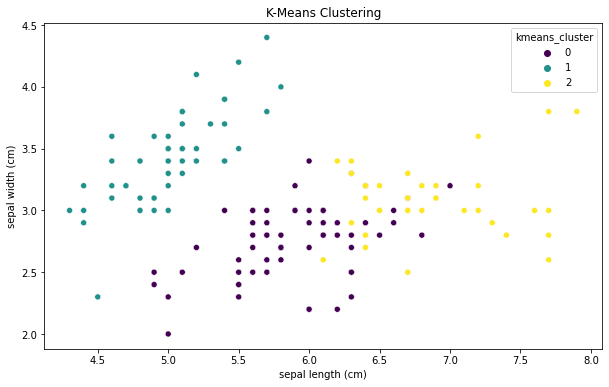

In [7]:
kmeans = KMeans(n_clusters=3, random_state=42) #n_clusters=3, we are defining number of clusters
df['kmeans_cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='kmeans_cluster', data=df, palette='viridis')
plt.title('K-Means Clustering')
plt.show()


**Hierarchical Clustering** is a method for grouping data points into clusters that form a hierarchy or a tree-like structure. Unlike some clustering methods where you need to decide how many clusters you want beforehand, Hierarchical Clustering builds a tree of clusters from the data.

### Steps

1. **Start with Each Data Point**: Imagine each data point starts in its own small cluster.

2. **Merge or Split**:
   - **Agglomerative Approach (Bottom-Up)**: Combine the closest clusters into bigger clusters step by step until everything is in one big cluster.
   - **Divisive Approach (Top-Down)**: Start with one big cluster and repeatedly split it into smaller clusters.

3. **Create a Dendrogram**: This is a tree-like diagram that shows how clusters are combined or split. The height of the branches in the dendrogram shows how similar or different the clusters are.

### How to Use It

- **Decide Number of Clusters**: To find out how many clusters you should have, you look at the dendrogram and decide where to cut the tree. This cut will give you the desired number of clusters.

In short, Hierarchical Clustering helps us to see how data points group together in a nested way and allows you to explore the data's structure at different levels of granularity.


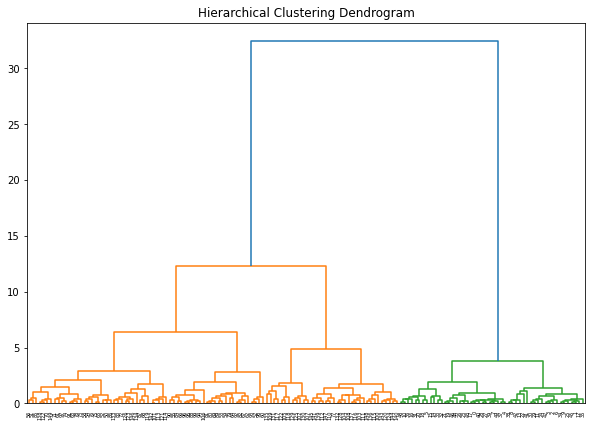

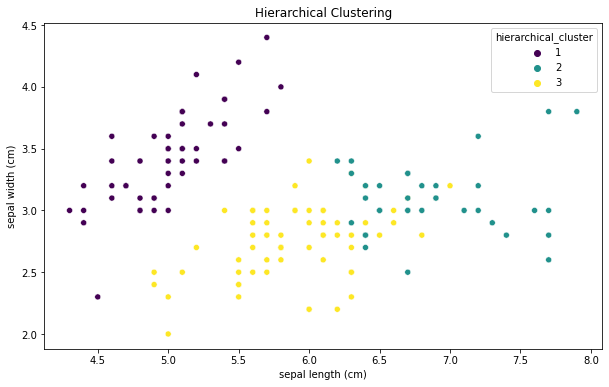

In [8]:
linked = linkage(X, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

df['hierarchical_cluster'] = fcluster(linked, t=3, criterion='maxclust')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='hierarchical_cluster', data=df, palette='viridis')
plt.title('Hierarchical Clustering')
plt.show()


**DBSCAN** is a clustering algorithm that groups data points based on how close they are to each other. It can find clusters of different shapes and sizes and is good at identifying noise or outliers.

### Steps

1. **Define Parameters**:
   - **Epsilon (ε)**: The maximum distance between two points to consider them as part of the same group.
   - **MinPts**: The minimum number of points needed in the epsilon distance to form a cluster.

2. **Find Core Points**:
   - A point is a **core point** if there are at least MinPts points within its epsilon distance.

3. **Form Clusters**:
   - **Core points** and the points around them (within epsilon distance) are grouped together.
   - **Border points** are added to these clusters if they are within epsilon distance from a core point.
   - Points that don’t fit into any cluster are labeled as **noise**.

### Key Features

- **No Need to Specify Number of Clusters**: You don’t have to decide how many clusters you want ahead of time.
- **Handles Noise**: Can detect and label outliers or noise in the data.
- **Finds Clusters of Different Shapes**: Good for discovering clusters that aren’t necessarily spherical.



DBSCAN helps in grouping data points that are close to each other and can handle clusters of different shapes and sizes. It also identifies noise, which makes it a flexible and useful tool for clustering data.


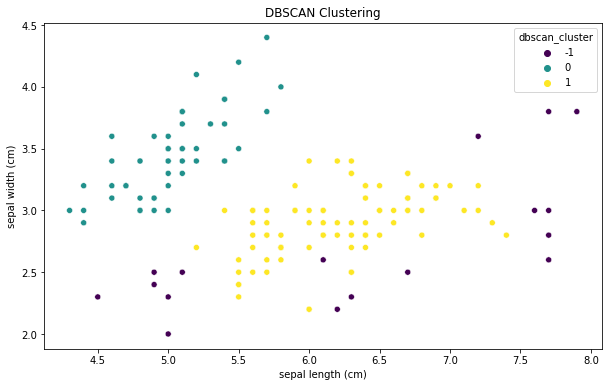

In [9]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['dbscan_cluster'] = dbscan.fit_predict(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='dbscan_cluster', data=df, palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()
